In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA
import missingno as msno

import plotly.express as px
import plotly.graph_objects as go

import pycountry
import geopandas
from geopandas import GeoDataFrame

In [2]:
df = pd.read_csv('layoffs_data.csv')

In [3]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Zoomo,Sydney,Transportation,27.0,0.08,2023-05-02,https://www.businessnewsaustralia.com/articles...,105.0,Series B,2023-05-02 16:26:35,Australia,Unknown
1,Lev,New York City,Real Estate,34.0,NaN,2023-05-01,https://therealdeal.com/new-york/2023/05/01/cr...,114.0,Series B,2023-05-01 23:51:06,United States,Unknown
2,PharmEasy,Mumbai,Healthcare,NaN,NaN,2023-05-01,https://www.dealstreetasia.com/stories/pharmea...,1600.0,Unknown,2023-05-02 16:23:27,India,Unknown
3,Cogito,New Delhi,Data,177.0,NaN,2023-04-29,https://inc42.com/buzz/protests-erupt-data-sta...,NaN,Unknown,2023-05-01 14:36:18,India,Unknown
4,Cue Health,San Diego,Healthcare,326.0,0.30,2023-04-28,https://www.sec.gov/Archives/edgar/data/162894...,899.0,Post-IPO,2023-05-01 23:57:54,United States,https://docs.google.com/spreadsheets/d/1P5d2Cr...


In [4]:
print(f"Shape :{df.shape}, Rows:{len(df)}, Columns: {len(df.columns)}")

Shape :(2553, 12), Rows:2553, Columns: 12


In [5]:
# to see statistical values of quantitative columns
df.describe()

,Laid_Off_Count,Percentage,Funds_Raised
count,1752.000000,1699.000000,2302.000000
mean,255.687215,0.261199,813.626975
std,840.166366,0.259197,5442.263467
min,3.000000,0.000000,0.000000
25%,38.000000,0.100000,50.000000
50%,80.000000,0.170000,156.000000
75%,180.000000,0.300000,442.000000
max,12000.000000,1.000000,121900.000000


In [6]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2553 non-null   object 
 1   Location_HQ                 2553 non-null   object 
 2   Industry                    2553 non-null   object 
 3   Laid_Off_Count              1752 non-null   float64
 4   Percentage                  1699 non-null   float64
 5   Date                        2551 non-null   object 
 6   Source                      2553 non-null   object 
 7   Funds_Raised                2302 non-null   float64
 8   Stage                       2553 non-null   object 
 9   Date_Added                  2553 non-null   object 
 10  Country                     2553 non-null   object 
 11  List_of_Employees_Laid_Off  2552 non-null   object 
dtypes: float64(3), object(9)
memory usage: 239.5+ KB


In [7]:
columns_to_be_dropped = ['Source', 'Date_Added', 'List_of_Employees_Laid_Off']
df = df.drop(columns_to_be_dropped, axis=True)
df.columns.values

array(['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count',
       'Percentage', 'Date', 'Funds_Raised', 'Stage', 'Country'],
      dtype=object)

In [8]:
df['Industry']

0       Transportation
1          Real Estate
2           Healthcare
3                 Data
4           Healthcare
             ...      
2548          Consumer
2549            Retail
2550         Logistics
2551             Other
2552           Finance
Name: Industry, Length: 2553, dtype: object

### Data Cleaning - Checking for null values

In [9]:
df.isnull().sum()

Company             0
Location_HQ         0
Industry            0
Laid_Off_Count    801
Percentage        854
Date                2
Funds_Raised      251
Stage               0
Country             0
dtype: int64

### Data Cleaning - Visualizing null values

<AxesSubplot:>

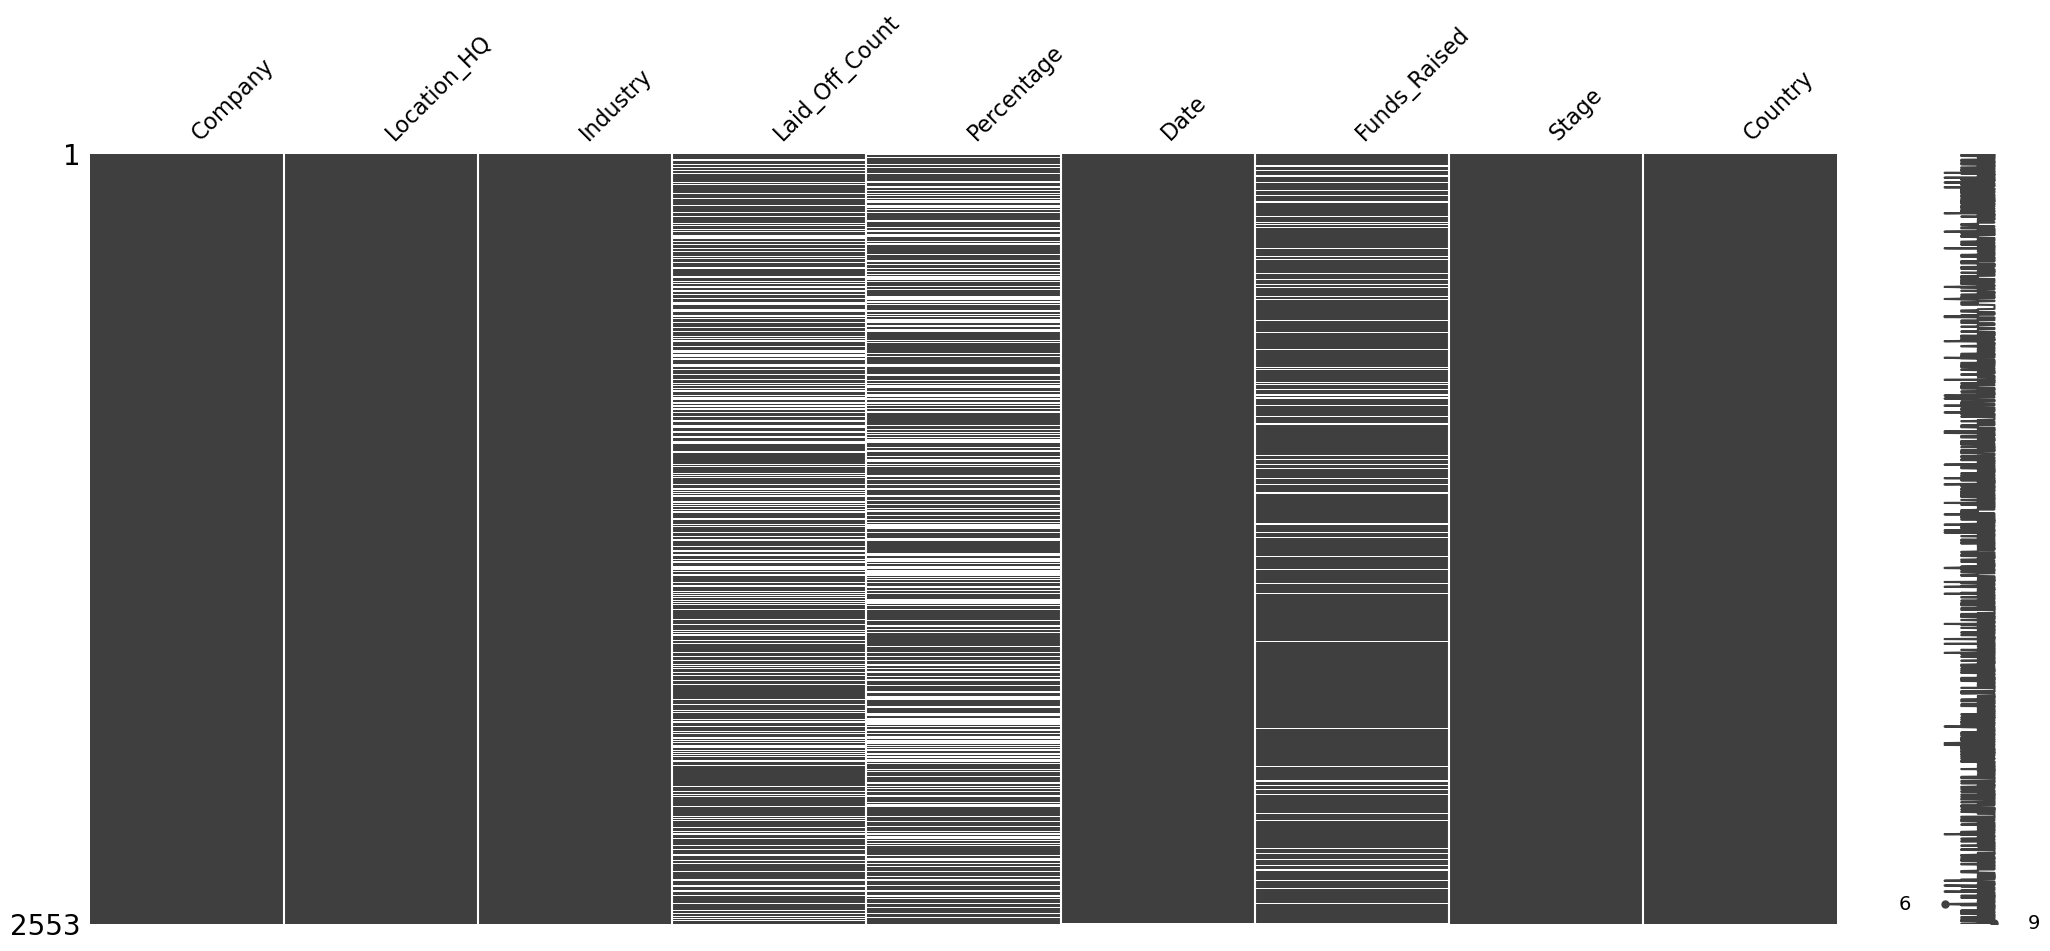

In [10]:
msno.matrix(df)

### Data Cleaning - Dropping missing values

In [11]:
df.dropna(inplace = True)

### Data Cleaning - Let's check the Missing values for the final time!

In [12]:
df.isnull().sum()

Company           0
Location_HQ       0
Industry          0
Laid_Off_Count    0
Percentage        0
Date              0
Funds_Raised      0
Stage             0
Country           0
dtype: int64

In [13]:
df_columns = df.columns
df_columns

Index(['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Percentage',
       'Date', 'Funds_Raised', 'Stage', 'Country'],
      dtype='object')

### Handling Date Column

In [14]:
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()
df.head(2)

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country
0,Zoomo,Sydney,Transportation,27.0,0.08,2023-05-02,105.0,Series B,Australia
4,Cue Health,San Diego,Healthcare,326.0,0.30,2023-04-28,899.0,Post-IPO,United States


In [15]:
df['month'] = df['Date'].dt.strftime('%b')
df['year'] = df['Date'].dt.year
df['month_year'] = df['Date'].dt.to_period('M')
df['quarter'] = pd.PeriodIndex(pd.to_datetime(df.Date), freq='Q')
df.head(2)

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,month,year,month_year,quarter
0,Zoomo,Sydney,Transportation,27.0,0.08,2023-05-02,105.0,Series B,Australia,May,2023,2023-05,2023Q2
4,Cue Health,San Diego,Healthcare,326.0,0.30,2023-04-28,899.0,Post-IPO,United States,Apr,2023,2023-04,2023Q2


### Exploratory Data Analysis

In [16]:
def explore_object_type(df ,feature_name):
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [17]:
explore_object_type(df, 'Company')

Swiggy           4
Redfin           4
Uber             4
Blend            4
Lyft             4
                ..
Chargebee        1
Dapper Labs      1
Checkmarx        1
Iron Ox          1
Tamara Mellon    1
Name: Company, Length: 991, dtype: int64


In [18]:
for featureName in df_columns:
    if df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df, str(featureName))
        print('--------------------------------------------------------------------------')


"Company's" Values with count are :
Swiggy           4
Redfin           4
Uber             4
Blend            4
Lyft             4
                ..
Chargebee        1
Dapper Labs      1
Checkmarx        1
Iron Ox          1
Tamara Mellon    1
Name: Company, Length: 991, dtype: int64
--------------------------------------------------------------------------

"Location_HQ's" Values with count are :
SF Bay Area      324
New York City    135
Boston            50
Bengaluru         48
Los Angeles       41
                ... 
Bristol            1
Indianapolis       1
Auckland           1
Kansas City        1
Lisbon             1
Name: Location_HQ, Length: 121, dtype: int64
--------------------------------------------------------------------------

"Industry's" Values with count are :
Finance           168
Retail             97
Healthcare         83
Transportation     80
Marketing          76
Food               69
Other              61
Consumer           54
Real Estate        52
Crypto    

In [19]:
for featureName in df_columns:
    if df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df, str(featureName))
        print('--------------------------------------------------------------------------')


"Company's" Values with count are :
Swiggy           4
Redfin           4
Uber             4
Blend            4
Lyft             4
                ..
Chargebee        1
Dapper Labs      1
Checkmarx        1
Iron Ox          1
Tamara Mellon    1
Name: Company, Length: 991, dtype: int64
--------------------------------------------------------------------------

"Location_HQ's" Values with count are :
SF Bay Area      324
New York City    135
Boston            50
Bengaluru         48
Los Angeles       41
                ... 
Bristol            1
Indianapolis       1
Auckland           1
Kansas City        1
Lisbon             1
Name: Location_HQ, Length: 121, dtype: int64
--------------------------------------------------------------------------

"Industry's" Values with count are :
Finance           168
Retail             97
Healthcare         83
Transportation     80
Marketing          76
Food               69
Other              61
Consumer           54
Real Estate        52
Crypto    

### Processed Data

In [20]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,month,year,month_year,quarter
0,Zoomo,Sydney,Transportation,27.0,0.08,2023-05-02,105.0,Series B,Australia,May,2023,2023-05,2023Q2
4,Cue Health,San Diego,Healthcare,326.0,0.30,2023-04-28,899.0,Post-IPO,United States,Apr,2023,2023-04,2023Q2
5,N26,Berlin,Finance,71.0,0.04,2023-04-28,1700.0,Series E,United States,Apr,2023,2023-04,2023Q2
7,Dropbox,SF Bay Area,Other,500.0,0.16,2023-04-27,1700.0,Post-IPO,United States,Apr,2023,2023-04,2023Q2
8,Alteryx,Los Angeles,Data,320.0,0.11,2023-04-27,613.0,Post-IPO,United States,Apr,2023,2023-04,2023Q2


Number of different countries : 37


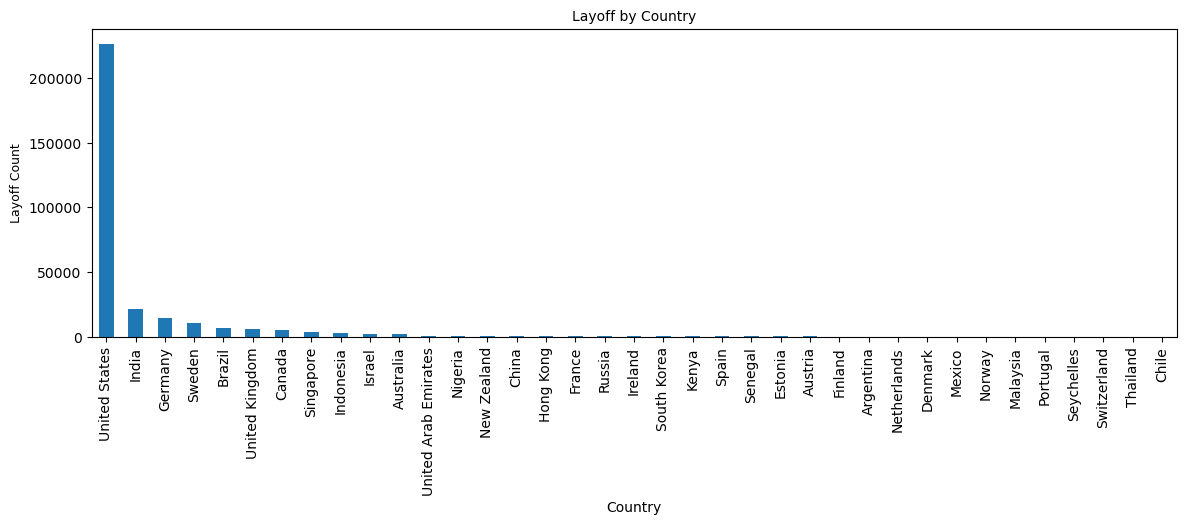

In [21]:
print(f"Number of different countries : {len(df['Country'].unique())}")

df.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(14,4),fontsize=10)
plt.title('Layoff by Country',size=10)
plt.xlabel('Country',size=10)
plt.ylabel('Layoff Count',size=9);

plt.show()

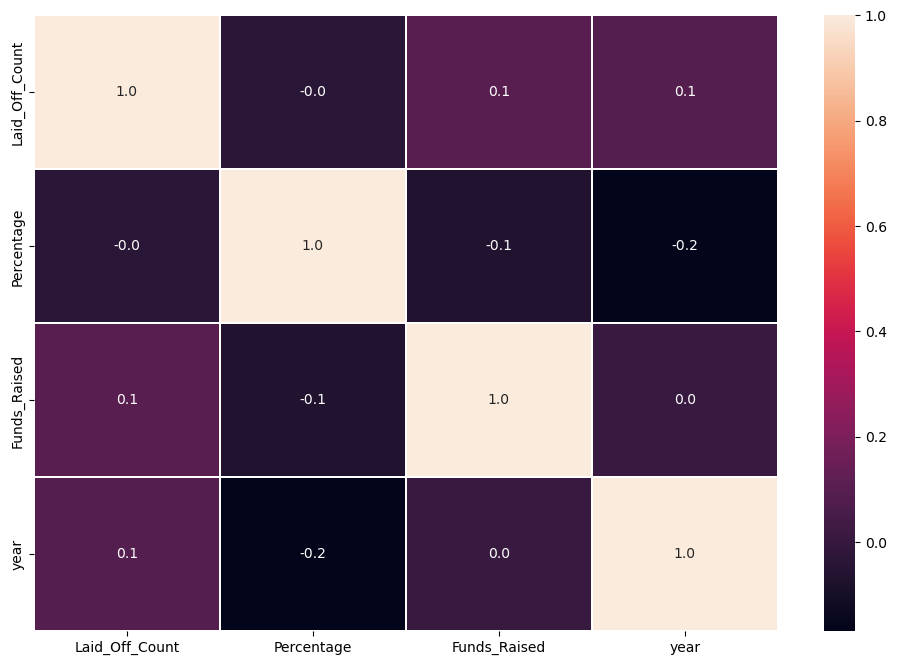

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.1f', linewidths=.1)
plt.show()

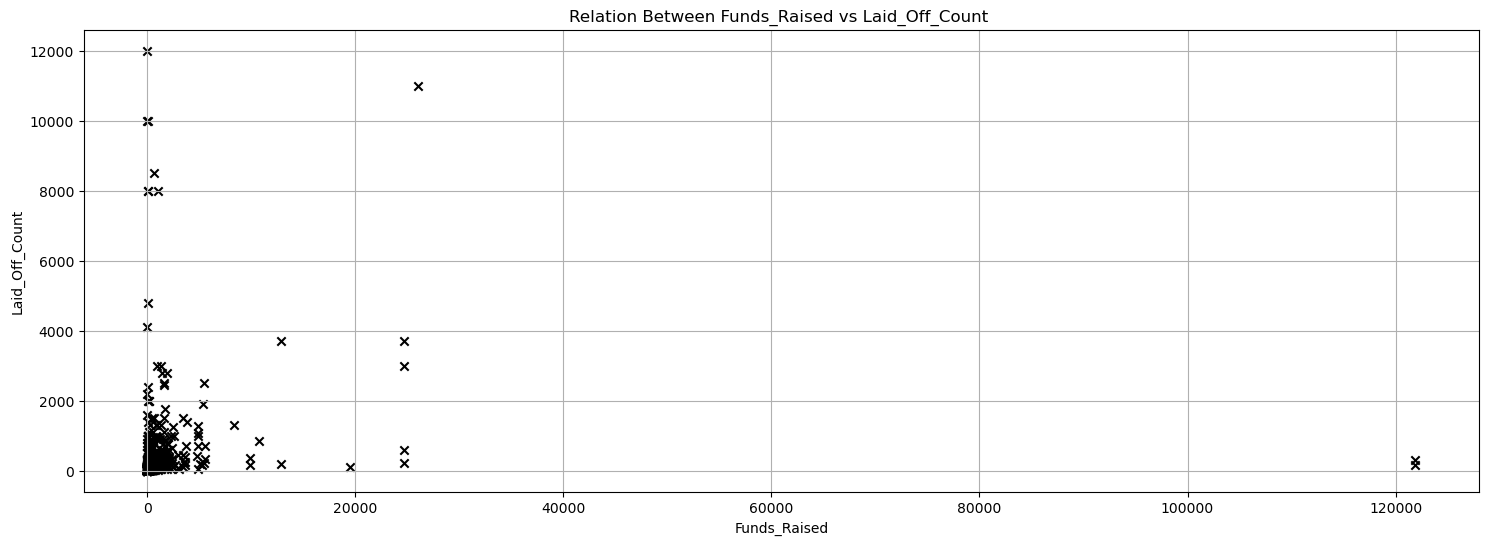

In [23]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Funds_Raised vs Laid_Off_Count ")

plt.grid()
plt.scatter(df['Funds_Raised'] , df['Laid_Off_Count'], c='k', marker='x')
plt.xlabel("Funds_Raised")
plt.ylabel("Laid_Off_Count")
plt.show()

Total number of unique industries: 30


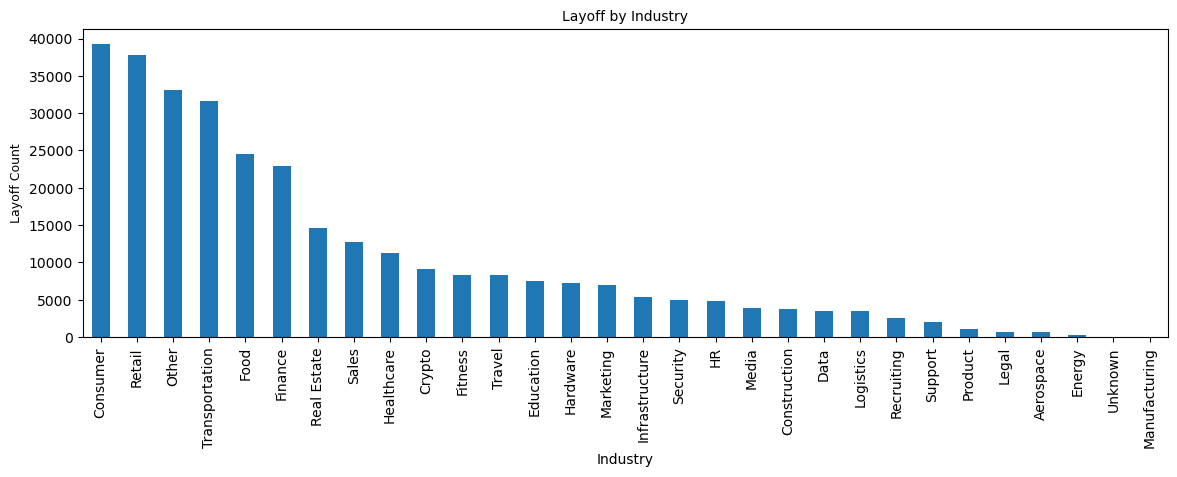

In [24]:
print(f"Total number of unique industries: {len(df['Industry'].unique())}")

df.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(14,4),fontsize=10)
plt.title('Layoff by Industry',size=10)
plt.xlabel('Industry',size=10)
plt.ylabel('Layoff Count',size=9);

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
nanyear = pd.isnull(df["Date"])
df = df.drop(df[nanyear].index)

In [26]:
nanyear = pd.isnull(df["Date"])
df = df.drop(df[nanyear].index)
df['year'] = df['Date'].dt.year
years = df['year'].unique().astype(int)


Top 10 companies to lay off employees in 2023


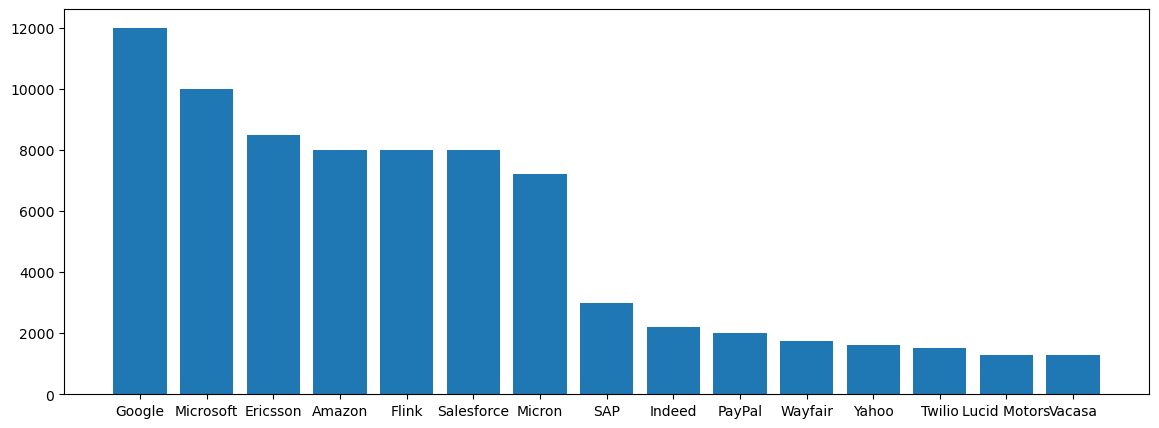


Top 10 companies to lay off employees in 2022


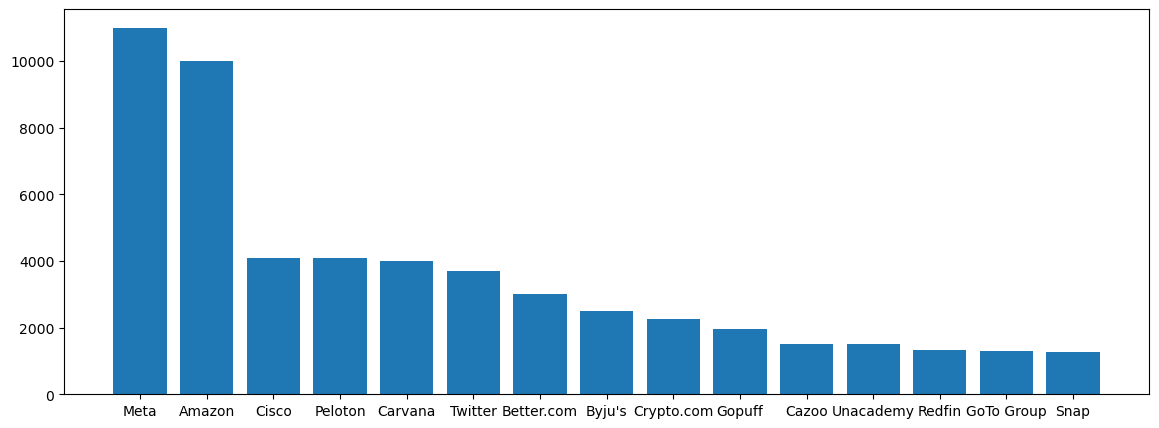


Top 10 companies to lay off employees in 2021


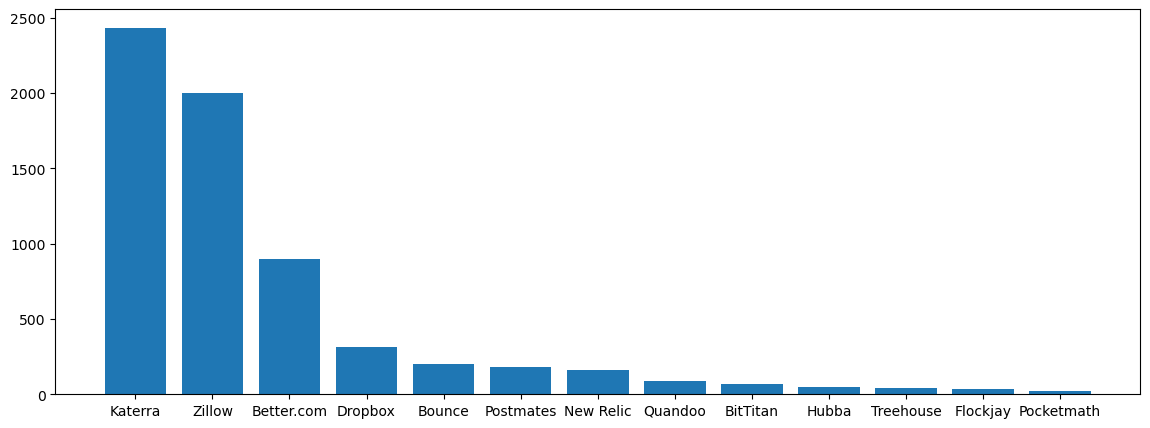


Top 10 companies to lay off employees in 2020


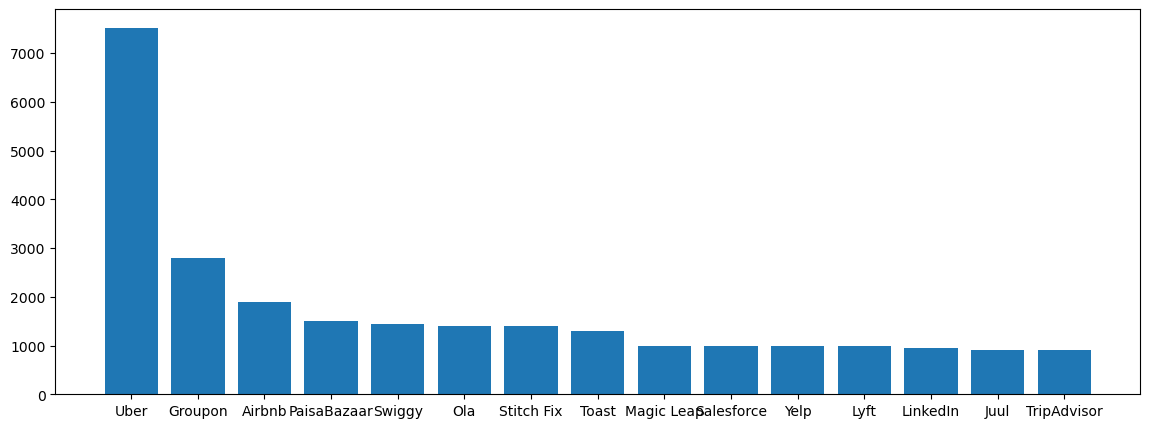

In [27]:
for year in years:
    top_10 = df[df['year'] == year]
    top_10 = top_10.groupby('Company')['Laid_Off_Count'].sum().nlargest(15)
    x = top_10.index
    y = top_10.values.astype(int)
    print(f"\nTop 10 companies to lay off employees in {year}")
    plt.subplots(figsize=(14,5))
    plt.bar(x, y)
    plt.show()

In [28]:
df.columns

Index(['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Percentage',
       'Date', 'Funds_Raised', 'Stage', 'Country', 'month', 'year',
       'month_year', 'quarter'],
      dtype='object')

In [29]:
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()

In [30]:
df.sort_values(by='Date', inplace=True)
print(df)

            Company    Location_HQ        Industry  Laid_Off_Count  \
2549  Tamara Mellon    Los Angeles          Retail            20.0   
2548    Panda Squad    SF Bay Area        Consumer             6.0   
2547   HopSkipDrive    Los Angeles  Transportation             8.0   
2545       Help.com         Austin         Support            16.0   
2544      Inspirato         Denver          Travel           130.0   
...             ...            ...             ...             ...   
16       Tickertape      Bengaluru         Finance            29.0   
10       Greenhouse  New York City      Recruiting           100.0   
5               N26         Berlin         Finance            71.0   
4        Cue Health      San Diego      Healthcare           326.0   
0             Zoomo         Sydney  Transportation            27.0   

      Percentage       Date  Funds_Raised           Stage        Country  \
2549        0.40 2020-03-12          90.0        Series C  United States   
2548   

In [31]:
df.dtypes

Company                   object
Location_HQ               object
Industry                  object
Laid_Off_Count           float64
Percentage               float64
Date              datetime64[ns]
Funds_Raised             float64
Stage                     object
Country                   object
month                     object
year                       int64
month_year             period[M]
quarter            period[Q-DEC]
dtype: object

### Creating Continent Column from Country data

In [32]:
def get_country_code(column):
    country_code=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
          
            country_code.append(code)
        except:
            country_code.append('None')
    return country_code


geo_df = df.groupby(['Country','Date','year','quarter'], as_index=False)["Laid_Off_Count", 'Percentage', 'Funds_Raised'].sum()

geo_df['country_code'] = get_country_code(geo_df.Country)
geo_df.head()

C:\Users\LAPTOP-ST-WIN-000\AppData\Local\Temp\ipykernel_22228\1480050247.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  geo_df = df.groupby(['Country','Date','year','quarter'], as_index=False)["Laid_Off_Count", 'Percentage', 'Funds_Raised'].sum()


,Country,Date,year,quarter,Laid_Off_Count,Percentage,Funds_Raised,country_code
0,Argentina,2022-05-23,2022,2022Q2,80.0,0.45,11.0,ARG
1,Argentina,2022-11-24,2022,2022Q4,100.0,0.38,17.0,ARG
2,Argentina,2022-11-30,2022,2022Q4,53.0,0.03,544.0,ARG
3,Australia,2020-05-04,2020,2020Q2,60.0,0.30,106.0,AUS
4,Australia,2020-05-28,2020,2020Q2,36.0,0.08,157.0,AUS


In [33]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'country_code', 'gdp_md_est', 'geometry']
world.head(2)

C:\Users\LAPTOP-ST-WIN-000\AppData\Local\Temp\ipykernel_22228\2640713853.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,country_code,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


In [34]:
geo_df = pd.merge(geo_df, world, how ="left", on='country_code')
geo_df.head(2)
columns_to_be_dropped = ['pop_est', 'gdp_md_est', 'name']
geo_df = geo_df.drop(columns_to_be_dropped, axis=True)
print(geo_df.columns.values)
print(geo_df.shape)

['Country' 'Date' 'year' 'quarter' 'Laid_Off_Count' 'Percentage'
 'Funds_Raised' 'country_code' 'continent' 'geometry']
(695, 10)


In [35]:
geo_df = GeoDataFrame(geo_df)

geo_df.head(3)

,Country,Date,year,quarter,Laid_Off_Count,Percentage,Funds_Raised,country_code,continent,geometry
0,Argentina,2022-05-23,2022,2022Q2,80.0,0.45,11.0,ARG,South America,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
1,Argentina,2022-11-24,2022,2022Q4,100.0,0.38,17.0,ARG,South America,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
2,Argentina,2022-11-30,2022,2022Q4,53.0,0.03,544.0,ARG,South America,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [36]:
# geo_df['Date'] = pd.to_datetime(geo_df['Date']).dt.normalize()

In [37]:
geo_df['Date'] = pd.to_datetime(geo_df['Date'])
geo_df = geo_df.sort_values('quarter', ascending=True)
geo_df['Date'] = geo_df['Date'].dt.strftime('%m-%d-%Y')

In [38]:
print(geo_df.head())

            Country        Date  year quarter  Laid_Off_Count  Percentage  \
347  United Kingdom  03-27-2020  2020  2020Q1           451.0        0.85   
68           Canada  03-27-2020  2020  2020Q1           125.0        0.40   
393   United States  03-31-2020  2020  2020Q1           948.0        1.74   
392   United States  03-30-2020  2020  2020Q1           486.0        2.19   
391   United States  03-29-2020  2020  2020Q1           417.0        1.39   

     Funds_Raised country_code      continent  \
347        3000.0          GBR         Europe   
68          250.0          CAN  North America   
393        1279.0          USA  North America   
392        1066.0          USA  North America   
391         244.0          USA  North America   

                                              geometry  
347  MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...  
68   MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
393  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
392  MULTIPOLY

In [61]:
import plotly.express as px
import pandas as pd

colorscale = ["rgb(255, 51, 51)", "rgb(210, 231, 154)", "rgb(94, 179, 39)", "rgb(67, 136, 33)", "rgb(33, 74, 12)"]


fig = px.choropleth(geo_df, locations='country_code', color='Laid_Off_Count', hover_name='Country', animation_frame='quarter',
                    title='Laid_Off_Count by Country', color_continuous_scale='darkmint')
fig.show()


In [49]:
px.pie(geo_df,names='continent',values='Laid_Off_Count',
      color_discrete_sequence=px.colors.sequential.Aggrnyl,
       title='Layoff by continent')

In [62]:
top_10 = df.groupby('Country').sum().sort_values(by='Percentage',ascending=False).head(10).reset_index()
top_10

,Country,Laid_Off_Count,Percentage,Funds_Raised,year
0,United States,226758.0,162.5425,715204.4000,1536398
1,India,21568.0,18.9700,83807.4000,157689
2,Canada,5065.0,14.7200,10716.0000,129383
3,Germany,14429.0,10.3750,20817.6800,80879
4,United Kingdom,6213.0,9.5300,20893.7000,70760
5,Israel,2387.0,8.5200,4039.0000,72791
6,Brazil,6743.0,8.2700,12575.7000,90971
7,Australia,2124.0,8.0700,3913.0000,44488
8,Singapore,3795.0,4.8400,14217.9755,36383
9,Denmark,185.0,1.3500,175.0000,4044


In [63]:
fig = px.scatter(geo_df, x="Funds_Raised", y="Laid_Off_Count", size="Laid_Off_Count", color="continent",
           hover_name="Country", log_x=True, size_max=60)
fig.show()

In [66]:
model = smf.ols(formula ='Laid_Off_Count ~ Funds_Raised + Percentage + continent', data = geo_df)

In [67]:
results = model.fit()

In [68]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Laid_Off_Count   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.049
Date:                Mon, 22 May 2023   Prob (F-statistic):           7.40e-07
Time:                        18:09:17   Log-Likelihood:                -5776.9
No. Observations:                 671   AIC:                         1.157e+04
Df Residuals:                     663   BIC:                         1.161e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [69]:
print(results.params)

Intercept                      99.344180
continent[T.Asia]             -34.551493
continent[T.Europe]            56.660217
continent[T.North America]    193.506797
continent[T.Oceania]         -205.298268
continent[T.South America]    -76.774212
Funds_Raised                    0.021012
Percentage                    608.327964
dtype: float64


### Interpretation:

#### Numerical variables:
Funds_Raised and Percentage have positive correlation with Laid_Off_Count and are statistically significant with p value > 0.05.

#### Categorical Variable:
continent variable has 5 continent categories where the coefficients are illustrating that North America has higher laid_off_count and Africa has'nt even picked up by the model due to very minimal lay offs there with respect to the data we have. 


Total number of unique industries: 30


Text(0, 0.5, 'Layoff Count')

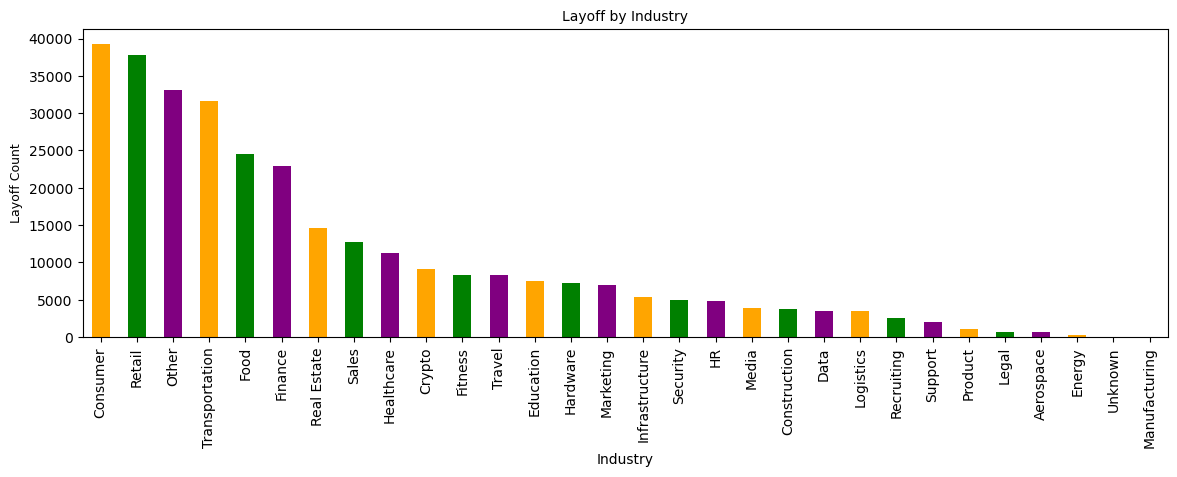

In [70]:
#laid off in each industry
print(f"Total number of unique industries: {len(df['Industry'].unique())}")


df.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(14,4),fontsize=10,color=['Orange','green','purple'])
plt.title('Layoff by Industry',size=10)
plt.xlabel('Industry',size=10)
plt.ylabel('Layoff Count',size=9)

In [71]:
#Top 5 countries laid off count each year
grouped=df.groupby(['year','Country'])['Laid_Off_Count'].sum()
Maxlaidoff=grouped.groupby('year').nlargest()

print(Maxlaidoff)

year  year  Country       
2020  2020  United States     44022.0
            India              9472.0
            United Kingdom     1478.0
            Brazil             1227.0
            Canada             1013.0
2021  2021  United States      6137.0
            India               200.0
            Germany              87.0
            Canada               45.0
            Singapore            21.0
2022  2022  United States     92465.0
            India              8861.0
            Brazil             4059.0
            Canada             2969.0
            Singapore          2844.0
2023  2023  United States     84134.0
            Germany           11763.0
            Sweden             9100.0
            India              3035.0
            United Kingdom     1966.0
Name: Laid_Off_Count, dtype: float64


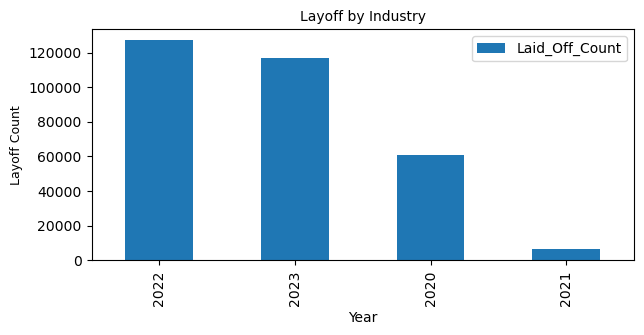

In [72]:
#Laid off each year
df.groupby('year')['Laid_Off_Count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(7,3),fontsize=10)
plt.title('Layoff by Industry',size=10)
plt.xlabel('Year',size=10)
plt.ylabel('Layoff Count',size=9);
plt.legend()

In [73]:
### From the above we can conclude that in 2022 the heighest number of people were fired in the United States in the consumer industry
###In recent years layoffs have increased particularly in Consumer, retail industry,hospitality industry, finance and health care sectors due to pandemic.


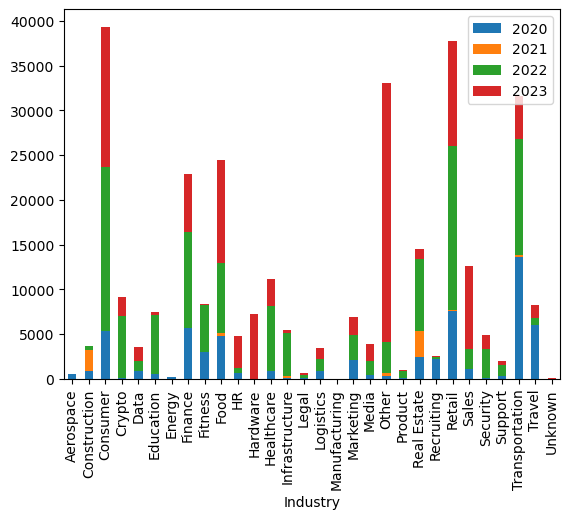

In [74]:
groupdata=df.groupby(['year','Industry'])['Laid_Off_Count'].sum().reset_index()
pdata=groupdata.pivot(index="Industry",columns="year", values='Laid_Off_Count')
pdata.plot(kind="bar",stacked=True)
plt.legend(loc="upper right")
plt.show()


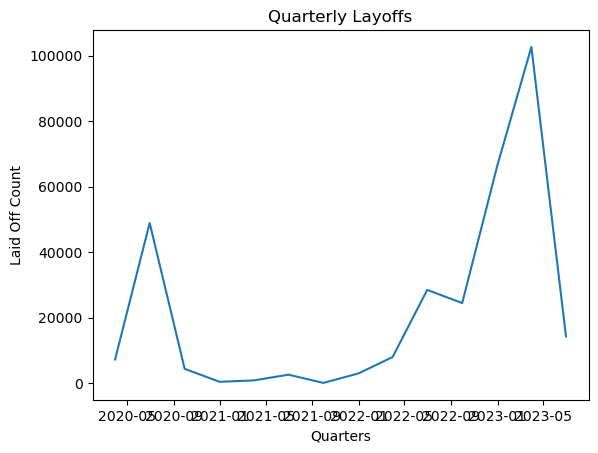

In [75]:
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M')

# Group the data by quarters and sum up the 'Laid_Off_Count' column
df_quarterly = df.groupby(pd.Grouper(key='Date', freq='Q'))['Laid_Off_Count'].sum()

# Create a plot of the quarterly layoffs
plt.plot(df_quarterly.index, df_quarterly.values)
plt.title('Quarterly Layoffs')
plt.xlabel('Quarters')
plt.ylabel('Laid Off Count')
plt.show()

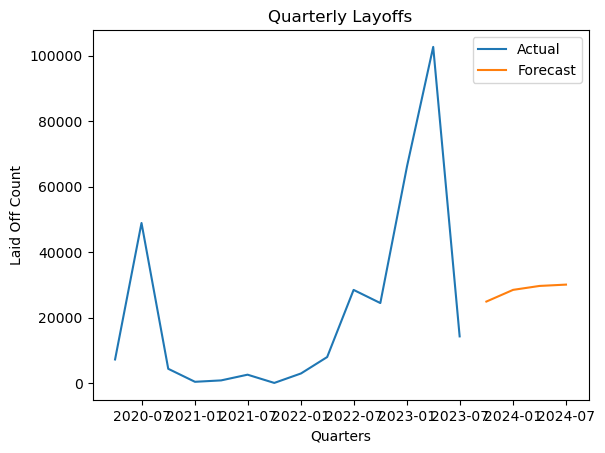

In [76]:
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M')

# Group the data by quarters and sum up the 'Laid_Off_Count' column
df_quarterly = df.groupby(pd.Grouper(key='Date', freq='Q'))['Laid_Off_Count'].sum()

# Create an ARIMA model with parameters (p, d, q) = (1, 1, 1)
model = ARIMA(df_quarterly, order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 4 quarters
forecast = model_fit.forecast(steps=4)

# Create a plot of the quarterly layoffs with the forecast
plt.plot(df_quarterly.index, df_quarterly.values, label='Actual')
plt.plot(forecast.index, forecast.values, label='Forecast')
plt.title('Quarterly Layoffs')
plt.xlabel('Quarters')
plt.ylabel('Laid Off Count')
plt.legend()
plt.show()